In [2]:
import pandas as pd

In [56]:
bse = pd.read_csv('C:/Users/Avijit/Downloads/BSESensex.csv', header=0)

In [57]:
bse.head()

,Date,Close
0,2018-07-03,35378.60156
1,2018-07-04,35645.39844
2,2018-07-05,35574.55078
3,2018-07-06,35657.85938
4,2018-07-09,35934.71875


In [58]:
bse.Date[1]

'2018-07-04'

In [59]:
from pandas import datetime

In [61]:
bse.head()

,Date,Close
0,2018-07-03,35378.60156
1,2018-07-04,35645.39844
2,2018-07-05,35574.55078
3,2018-07-06,35657.85938
4,2018-07-09,35934.71875


In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import Series
bse_series = Series.from_csv('C:/Users/Avijit/Downloads/BSESensex.csv', header=0)


C:\Users\Avijit\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


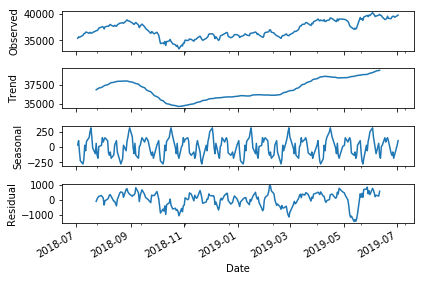

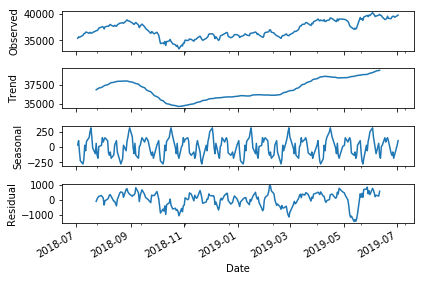

In [64]:
result = seasonal_decompose(bse_series,freq = 30, model='additive')
result.plot()

In [66]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(bse_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
 dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                  -1.160889
p-value                          0.690190
#Lags Used                       0.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


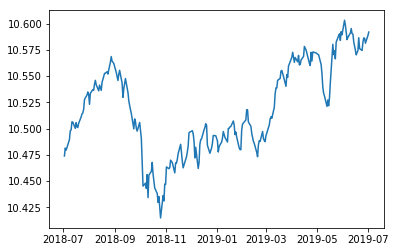

In [68]:
##P-value is very high, Hence Series in non stationary.
#Taking log value
import numpy as np
ts_log = np.log(bse_series)
plt.plot(ts_log)

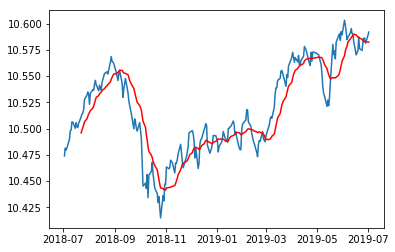

In [69]:
#15 day moving avearge
moving_avg = ts_log.rolling(15).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

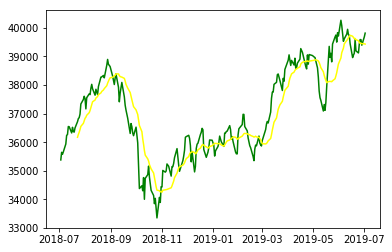

In [72]:
moving_avg2 = bse_series.rolling(15).mean()
plt.plot(bse_series, color='green')
plt.plot(moving_avg2, color='yellow')

In [3]:
import statsmodels.tsa.holtwinters as ets
bse = pd.read_csv('C:/Users/Avijit/Downloads/BSESensex.txt', index_col = 'Date', parse_dates = True)
bse = bse.asfreq('B')
bse = bse.fillna(method='ffill')
bse.head(10)

,Close
Date,
2018-07-03,35378.60156
2018-07-04,35645.39844
2018-07-05,35574.55078
2018-07-06,35657.85938
2018-07-09,35934.71875
2018-07-10,36239.62109
2018-07-11,36265.92969
2018-07-12,36548.41016
2018-07-13,36541.62891


In [89]:
bsetrn = bse[:'2019-03-31']
bsetst = bse['2019-04-01':]

In [90]:
expsm = ets.ExponentialSmoothing(bsetrn).fit()
expsmf = expsm.forecast(steps = len(bsetst))
expsmf = pd.DataFrame(expsmf).set_index(bsetst.index)

<function matplotlib.pyplot.show(*args, **kw)>

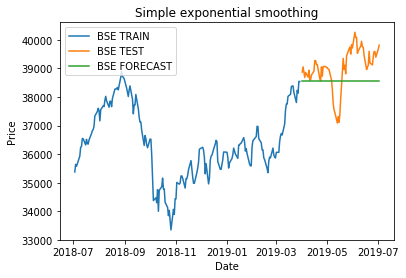

In [93]:
import matplotlib.pyplot as plt
fig1, ax = plt.subplots()
ax.plot(bsetrn, label = 'BSE TRAIN')
ax.plot(bsetst, label = 'BSE TEST')
ax.plot(expsmf, label = 'BSE FORECAST')
plt.legend(loc ='upper left')
plt.title('Simple exponential smoothing')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

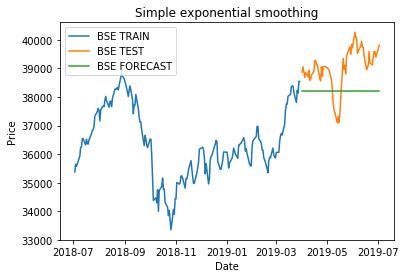

In [106]:
expsm = ets.ExponentialSmoothing(bsetrn).fit(smoothing_level=0.2,optimized=False)
expsmf = expsm.forecast(steps = len(bsetst))
expsmf = pd.DataFrame(expsmf).set_index(bsetst.index)
fig1, ax = plt.subplots()
ax.plot(bsetrn, label = 'BSE TRAIN')
ax.plot(bsetst, label = 'BSE TEST')
ax.plot(expsmf, label = 'BSE FORECAST')
plt.legend(loc ='upper left')
plt.title('Simple exponential smoothing')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show

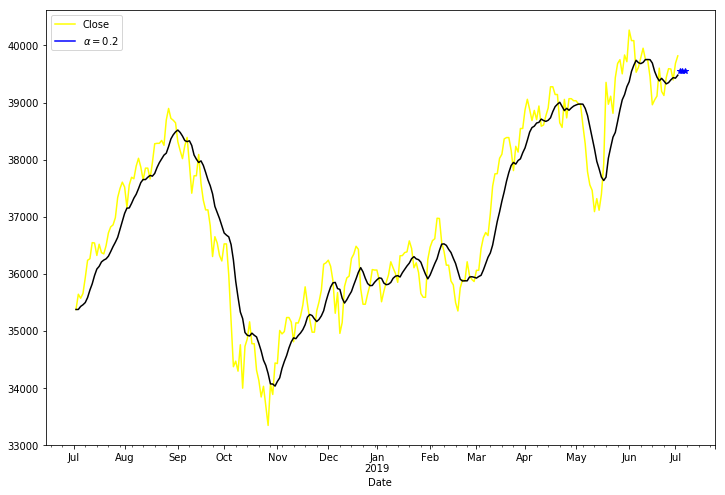

In [117]:
fit1 = SimpleExpSmoothing(bse).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')

ax = bse.plot( color='yellow', figsize=(12,8))
fcast1.plot(marker='*', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot( ax=ax, color='black')
plt.show()

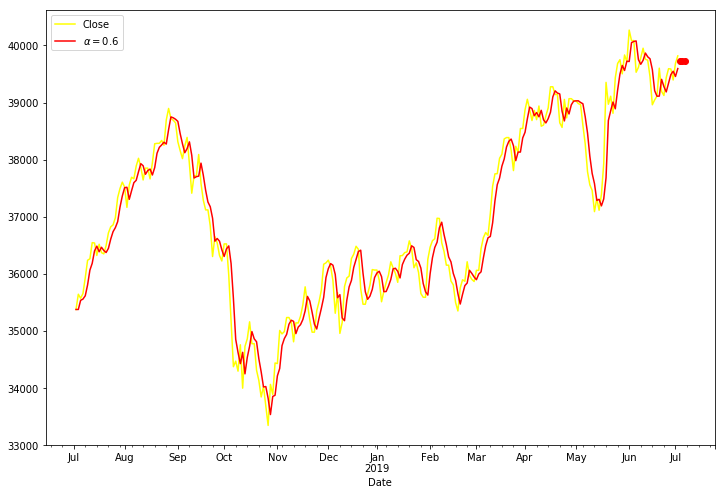

In [118]:
fit2 = SimpleExpSmoothing(bse).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
ax = bse.plot(color='yellow', figsize=(12,8))
fcast2.plot(marker='o', ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(ax=ax, color='red')
plt.show()

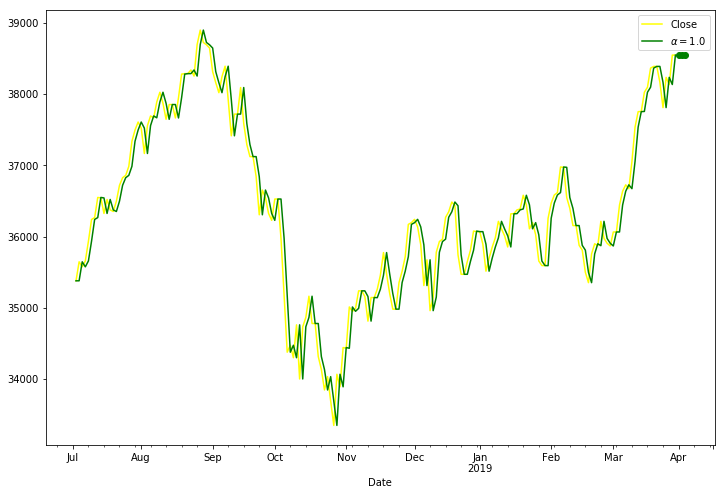

In [120]:
#Auto alpha
fit3 = SimpleExpSmoothing(bsetrn).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
ax = bsetrn.plot(color='yellow', figsize=(12,8))
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(ax=ax, color='green')
plt.show()

In [17]:
$ python -m pip install pmdarima

SyntaxError: invalid syntax (<ipython-input-17-4fd4926ce3ef>, line 1)

In [13]:
from pmdarima.arima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'